# Calibrating TTim model to hypothetical pumping test

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import ttim

### Use observation times from Oude Korendijk

In [2]:
drawdown = np.loadtxt("data/oudekorendijk_h30.dat")
tobs = drawdown[:, 0] / 60 / 24
robs = 30
Q = 788

### Generate data

In [3]:
ml = ttim.ModelMaq(kaq=60, z=(-18, -25), Saq=1e-4, tmin=1e-5, tmax=1)
w = ttim.Well(ml, xw=0, yw=0, rw=0.1, tsandQ=[(0, 788)], layers=0)
ml.solve()
rnd = np.random.default_rng(2)
hobs = ml.head(robs, 0, tobs)[0] + 0.05 * rnd.random(len(tobs))

self.neq  1
solution complete


### See if TTim can find aquifer parameters back

In [4]:
cal = ttim.Calibrate(ml)
cal.set_parameter(name="kaq0", initial=100)
cal.set_parameter(name="Saq0", initial=1e-3)
cal.series(name="obs1", x=robs, y=0, layer=0, t=tobs, h=hobs)
cal.fit()

............................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 41
    # data points      = 34
    # variables        = 2
    chi-square         = 0.09714912
    reduced chi-square = 0.00303591
    Akaike info crit   = -195.167536
    Bayesian info crit = -192.114815
[[Variables]]
    kaq0:  59.5331900 +/- 2.36790654 (3.98%) (init = 100)
    Saq0:  9.2405e-05 +/- 1.2516e-05 (13.54%) (init = 0.001)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.851


In [5]:
cal.parameters

optimal       std perc_std  pmin  pmax initial  \
kaq0      59.5332  2.367907  3.97746  -inf   inf     100   
Saq0  9.24053e-05  0.000013  13.5447  -inf   inf   0.001   

                       parray  
kaq0      [59.53319002210707]  
Saq0  [9.240529867448516e-05]

In [6]:
print("rmse:", cal.rmse())

rmse: 0.05345397106082128


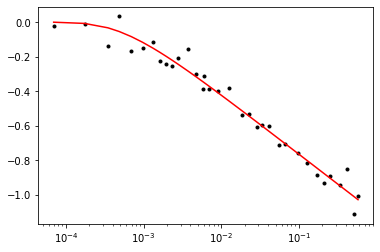

In [7]:
hm = ml.head(robs, 0, tobs, 0)
plt.semilogx(tobs, hobs, ".k")
plt.semilogx(tobs, hm[0], "r")

In [8]:
print("correlation matrix")
print(cal.fitresult.covar)

correlation matrix
[[ 5.60698139e+00 -2.52171428e-05]
 [-2.52171428e-05  1.56651901e-10]]


Fit with `scipy.least_squares` (not recommended)

In [9]:
cal = ttim.Calibrate(ml)
cal.set_parameter(name="kaq0", initial=100)
cal.set_parameter(name="Saq0", initial=1e-3)
cal.series(name="obs1", x=robs, y=0, layer=0, t=tobs, h=hobs)
cal.fit_least_squares(report=True)

......................................................
         optimal       std perc_std  pmin  pmax initial  \
kaq0     59.5334  2.339157  3.92915  -inf   inf     100   
Saq0  9.2398e-05  0.000012  13.4157  -inf   inf   0.001   

                      parray  
kaq0     [59.53335695354822]  
Saq0  [9.23979769151393e-05]  
[2.33915730e+00 1.23958453e-05]
[[ 5.47165689e+00 -2.46555615e-05]
 [-2.46555615e-05  1.53656981e-10]]
[[ 1.         -0.85031398]
 [-0.85031398  1.        ]]


## Calibrate parameters in multiple layers
Example showing how parameters can be optimized when multiple layers share the same parameter value.

In [10]:
ml = ttim.ModelMaq(
    kaq=[10.0, 10.0],
    z=(-10, -16, -18, -25),
    c=[10.0],
    Saq=[0.1, 1e-4],
    tmin=1e-5,
    tmax=1,
)
w = ttim.Well(ml, xw=0, yw=0, rw=0.1, tsandQ=[(0, 788)], layers=1)
ml.solve()
hobs0 = ml.head(robs, 0, tobs, layers=[0])[0]
hobs1 = ml.head(robs, 0, tobs, layers=[1])[0]

self.neq  1
solution complete


In [11]:
cal.parameters

optimal       std perc_std  pmin  pmax initial  \
kaq0     59.5334  2.339157  3.92915  -inf   inf     100   
Saq0  9.2398e-05  0.000012  13.4157  -inf   inf   0.001   

                      parray  
kaq0     [59.53335695354822]  
Saq0  [9.23979769151393e-05]

In [12]:
cal = ttim.Calibrate(ml)
cal.set_parameter(
    name="kaq0_1", initial=20.0, pmin=0.0, pmax=30.0
)  # layers 0 and 1 have the same k-value
cal.set_parameter(name="Saq0", initial=1e-3, pmin=1e-5, pmax=0.2)
cal.set_parameter(name="Saq1", initial=1e-3, pmin=1e-5, pmax=0.2)
cal.set_parameter(name="c1", initial=1.0, pmin=0.1, pmax=200.0)
cal.series(name="obs0", x=robs, y=0, layer=0, t=tobs, h=hobs0)
cal.series(name="obs1", x=robs, y=0, layer=1, t=tobs, h=hobs1)
cal.fit(report=False)
display(cal.parameters)

..............................................................................................
Fit succeeded.


optimal           std  perc_std     pmin   pmax  initial  \
kaq0_1  10.002821  7.760404e-04  0.007758  0.00000   30.0   20.000   
Saq0     0.099977  1.029338e-06  0.001030  0.00001    0.2    0.001   
Saq1     0.000100  2.783601e-09  0.002783  0.00001    0.2    0.001   
c1      10.000832  2.330321e-04  0.002330  0.10000  200.0    1.000   

                                        parray  
kaq0_1  [10.00282083843134, 10.00282083843134]  
Saq0                     [0.09997723703792818]  
Saq1                  [0.00010001141042525883]  
c1                        [10.000832122134655]

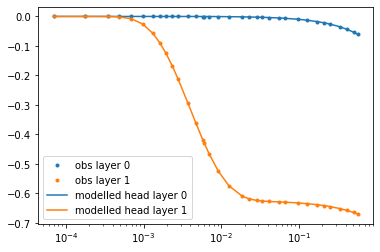

In [13]:
plt.semilogx(tobs, hobs0, ".C0", label="obs layer 0")
plt.semilogx(tobs, hobs1, ".C1", label="obs layer 1")

hm = ml.head(robs, 0, tobs)
plt.semilogx(tobs, hm[0], "C0", label="modelled head layer 0")
plt.semilogx(tobs, hm[1], "C1", label="modelled head layer 1")

plt.legend(loc="best")

### Generate data for head measured in well

In [9]:
tobs2 = np.hstack((tobs, np.arange(0.61, 1, 0.01)))

In [12]:
ml = ttim.ModelMaq(kaq=60, z=(-18, -25), Saq=1e-4, tmin=1e-5, tmax=1)
w = ttim.Well(ml, xw=0, yw=0, rw=0.3, res=0.02, tsandQ=[(0, 788), (0.6, 0)], layers=0)
ml.solve()
rnd = np.random.default_rng(2)
hobs2 = w.headinside(tobs2)[0] + 0.05 * rnd.random(len(tobs2))

self.neq  1
solution complete


In [13]:
cal = ttim.Calibrate(ml)
cal.set_parameter(name="kaq0", initial=100)
cal.set_parameter(name="Saq0", initial=1e-3)
cal.set_parameter_by_reference(name="res", parameter=w.res[:], initial=0.05)
cal.seriesinwell(name="obs1", element=w, t=tobs2, h=hobs2)
cal.fit()

..................................................................................................................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 143
    # data points      = 73
    # variables        = 3
    chi-square         = 0.17064806
    reduced chi-square = 0.00243783
    Akaike info crit   = -436.278631
    Bayesian info crit = -429.407253
[[Variables]]
    kaq0:  60.2257029 +/- 1.32915917 (2.21%) (init = 100)
    Saq0:  0.00144777 +/- 0.00829132 (572.70%) (init = 0.001)
    res:   0.02699969 +/- 0.01388099 (51.41%) (init = 0.05)
[[Correlations]] (unreported correlations are < 0.100)
    C(Saq0, res)  =  1.000
    C(kaq0, Saq0) = -0.530
    C(kaq0, res)  = -0.506


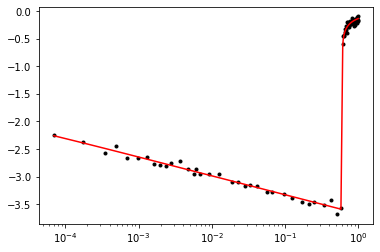

In [15]:
hm = w.headinside(tobs2)
plt.semilogx(tobs2, hobs2, ".k")
plt.semilogx(tobs2, hm[0], "r")